<a href="https://colab.research.google.com/github/poziryna84/Neural-Network-Models/blob/master/Google_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from fastai.vision import *
from fastai import *

In [0]:
folder = 'mermaid'
file = 'mermaid.txt'

In [0]:

folder = 'fish'
file = 'fish.txt'

In [0]:

folder = 'women'
file = 'women.txt'

In [0]:
path = Path('/content/drive/My Drive/mermaid')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(path/file, dest, max_pics=200)

In [83]:

path.ls()

[PosixPath('/content/drive/My Drive/mermaid/women.txt'),
 PosixPath('/content/drive/My Drive/mermaid/mermaid.txt'),
 PosixPath('/content/drive/My Drive/mermaid/fish.txt'),
 PosixPath('/content/drive/My Drive/mermaid/mermaid'),
 PosixPath('/content/drive/My Drive/mermaid/fish'),
 PosixPath('/content/drive/My Drive/mermaid/women'),
 PosixPath('/content/drive/My Drive/mermaid/murmaid')]

In [0]:
classes = ['fish','women','mermaid']

Removing any images that can't be opened:

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

Viewing the data:

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [94]:
data.classes


['fish', 'mermaid', 'women']

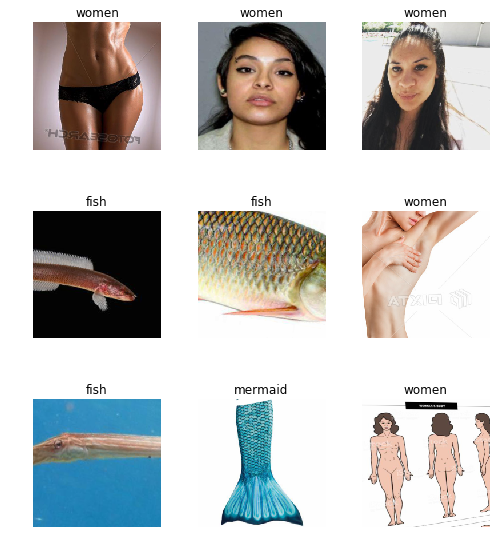

In [95]:
data.show_batch(rows=3, figsize=(7,8))

We have got three classes, 232 photos in the training set and 57 in the validation set.


In [96]:

data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['fish', 'mermaid', 'women'], 3, 232, 57)

Training model


In [97]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fec70bb1c18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 677, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 659, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 124, in join
    res = self._popen.wait(timeout)
  File "/usr/lib/python3.6/multiprocessing/popen_fork.py", line 50, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/usr/lib/python3.6/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt: 
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 135002561.02it/s

In [98]:

learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.248221,0.875994,0.526316,01:20
1,0.796001,0.337523,0.140351,01:21
2,0.567941,0.096958,0.035088,01:20
3,0.450774,0.041796,0.000000,01:20


In [0]:
learn.save('stage-11')

In [0]:
learn.unfreeze()

Choosing a learning rate.

In [123]:
learn.lr_find()

ZeroDivisionError: ignored

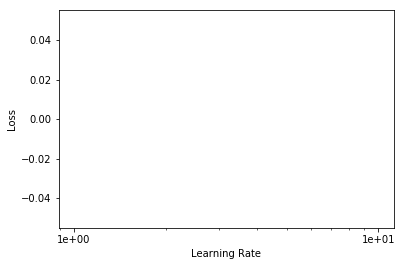

In [101]:
learn.recorder.plot()

In [0]:

learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

In [0]:
learn.save('stage-111')

Interpretation

In [103]:

learn.load('stage-11');

Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
OSError: [Errno 9] Bad file descriptor
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 230, in _feed
    close()
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

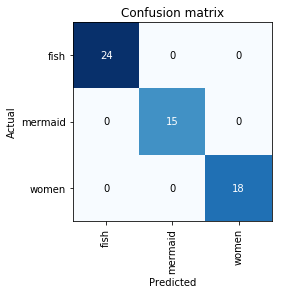

In [105]:
interp.plot_confusion_matrix()

Putting your model in production

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

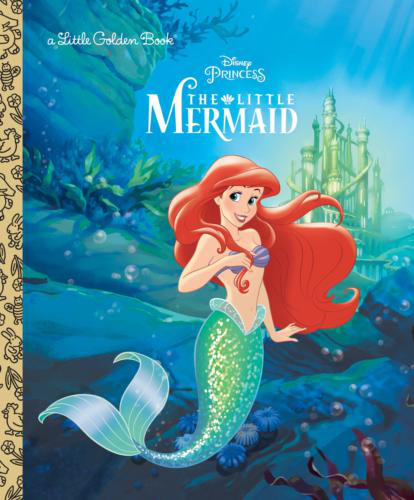

In [117]:
img = open_image('/content/drive/My Drive/mermaid/mermaid/00000000.jpg')
img

In [0]:

learn = load_learner(path)

In [119]:

pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category mermaid